In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
import spacy
import string
import re 
%matplotlib inline

In [2]:
import os
path = os.getcwd()
print(path)
df_train = pd.read_csv(path+'\dataset\Train.csv')
df_test = pd.read_csv(path+'\dataset\Test.csv')

c:\Users\91895\Desktop\NLP


In [3]:
df = [df_train, df_test]

In [4]:
for data in df:
    print(data.shape)

(40000, 2)
(5000, 2)


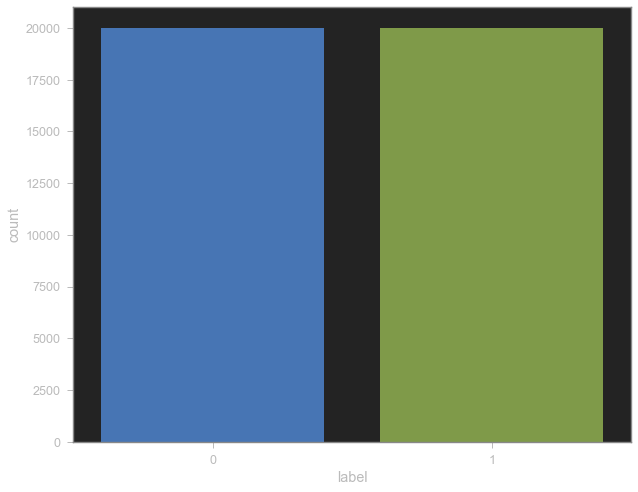

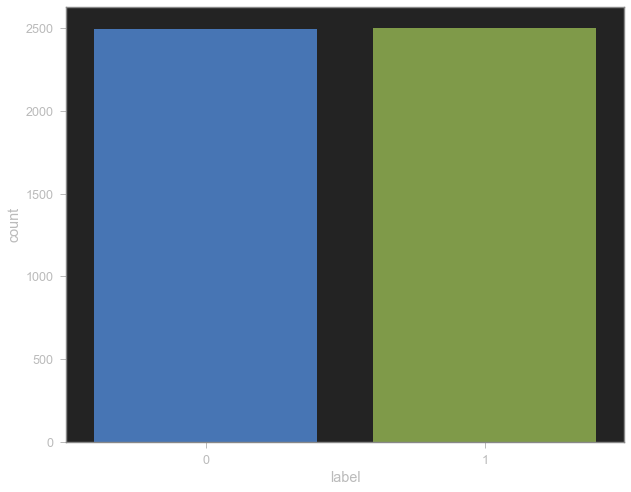

In [5]:
import seaborn as sns
for data in df:
    plt.figure(figsize=(10,8))
    sns.countplot(x = data['label'], data = data)
    plt.show()

Provided data is balanced data

Text data preprocessing

In [6]:
#converting to lower case
for data in df:
    data['text'] = data['text'].str.lower()

In [7]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [8]:
for data in df:
    data['text'] = data['text'].apply(remove_urls)

In [9]:
def remove_emoji(text):
    text = re.sub('<[^>]*.', '', text)
    emojis = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
    text=re.sub('[\W]+',' ',text.lower()) +\
                ' '.join(emojis).replace('-','')
    return text


In [10]:
for data in df:
    data['text'] = data['text'].apply(remove_emoji)

In [11]:
df_train.head()

,text,label
0,i grew up b 1965 watching and loving the thund...,0
1,when i put this movie in my dvd player and sat...,0
2,why do people who do not know what a particula...,0
3,even though i have great interest in biblical ...,0
4,im a die hard dads army fan and nothing will e...,1


In [12]:
#removing punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

for data in df:
    data['text'] = data['text'].apply(remove_punctuation)

In [13]:
data['text'][100]

'maybe it s unfair to dislike a movie for what it isn t rather than what it is but i approached this hoping that finally a filmmaker would make a movie about small town rural gay men and women instead the focus is primarily on the outrageous bigotry big news of the locals and those in outlying areas and the really gruesome torture murder of a young gay man so much time devoted to stupid people squawking about aids sin hellfire and perverts so much time devoted to the ghoulish preacher ranting about the bible and gay people getting what they deserve i wanted to see more of the people that came to the small town gay bar not those who opposed it in addition the young man who was murdered isn t even from this town the whole movie works as a warning rather than a celebration and it s very suspect '

In [14]:
from nltk.tokenize import word_tokenize


In [15]:
df_train['text'][1]

'when i put this movie in my dvd player and sat down with a coke and some chips i had some expectations i was hoping that this movie would contain some of the strong points of the first movie awsome animation good flowing story excellent voice cast funny comedy and a kick ass soundtrack but to my disappointment not any of this is to be found in atlantis milo s return had i read some reviews first i might not have been so let down the following paragraph will be directed to those who have seen the first movie and who enjoyed it primarily for the points mentioned when the first scene appears your in for a shock if you just picked atlantis milo s return from the display case at your local videoshop or whatever and had the expectations i had the music feels as a bad imitation of the first movie and the voice cast has been replaced by a not so fitting one with the exception of a few characters like the voice of sweet the actual drawings isnt that bad but the animation in particular is a sad

In [16]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# for data in df:
#     data['text'] = [word for word in data['text'].str.split() if word not in stopwords.words('english')]

In [17]:
# def tokenize_word(text):
#     return text.split()

# for data in df:
#     data['text'] = data['text'].apply(tokenize_word)



In [18]:
# from nltk.stem.porter import PorterStemmer
# stemmer = PorterStemmer()
# def stem_words(text):
#     return " ".join([stemmer.stem(word) for word in text])

# for data in df:
#     data["text"] = data["text"].apply(lambda text: stem_words(text))

In [19]:
from wordcloud import wordcloud


In [20]:
from wordcloud import WordCloud
positivedata = df_train[ df_train['label'] == 1]
positivedata =positivedata['text']
negdata = df_train[df_train['label'] == 0]
negdata= negdata['text']

In [21]:
def wordcloud_draw(data, color = 'white'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                              if(word!='movie' and word!='film')
                            ])
    wordcloud = WordCloud(stopwords=stop_words,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [22]:
# print("Positive words are as follows")
# wordcloud_draw(positivedata,'white')
# print("Negative words are as follows")
# wordcloud_draw(negdata)

In [23]:
from nltk.stem.porter import PorterStemmer
porter=PorterStemmer()
def tokenizer(text):
        return text.split()
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [24]:
#TF-IDF vectorisation
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents = None, lowercase = False, preprocessor = None, tokenizer = tokenizer_porter, use_idf = True, norm = 'l2', smooth_idf = True)
y = df_train['label'].values
x = tfidf.fit_transform(df_train['text'])

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state = 1, test_size = 0.2, shuffle = False)

In [26]:
#train model

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter = 500).fit(X_train,y_train)

In [27]:
y_pred = clf.predict(X_test)



In [28]:
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.89525


In [29]:
X_val = tfidf.transform(df_test['text'])
y_val = df_test['label']

In [30]:
y_pred_val = clf.predict(X_val)
print('Accuracy:', accuracy_score(y_pred_val, y_val))

Accuracy: 0.8974


In [31]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [32]:
from sklearn.metrics import roc_auc_score

In [33]:
y_pred_xgb = xgb.fit(X_train,y_train).predict(X_test)
print('ROC-Score:', roc_auc_score(y_pred_xgb,y_test))

c:\Users\91895\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:04:04] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
ROC-Score: 0.8599759726313254


In [34]:
y_val_xgb = xgb.predict(X_val)
print('ROC-Score:', roc_auc_score(y_val_xgb,y_val))

ROC-Score: 0.8702242716076067


In [35]:
print(X_train.shape)

(32000, 66211)


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state = 1, test_size = 0.2, shuffle = False)

In [56]:
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)

In [58]:
from scipy.sparse import lil_matrix
X_train = lil_matrix(X_train).toarray()


In [59]:
X_train.shape

(32000, 66211)

In [45]:
import torch.nn as nn
import torch

In [60]:
X_train = torch.from_numpy(X_train)
y_train = torch.from_numpy(y_train)

In [61]:

class Neural_Net(nn.Module):
  
  def __init__(self, input_dim, hidden_dim ):
    super().__init__()
    torch.manual_seed(0)
    self.net = nn.Sequential(
        nn.Linear(input_dim, hidden_dim), 
        nn.Tanh(), 
        nn.Linear(hidden_dim, 1), 
        nn.Sigmoid()
    )

  def forward(self, X):
    return self.net(X)

In [62]:
input_dim = X_train.shape[1]
hidden_dim = 100
model = Neural_Net(input_dim, hidden_dim)

In [63]:
print(model.parameters)

<bound method Module.parameters of Neural_Net(
  (net): Sequential(
    (0): Linear(in_features=66211, out_features=100, bias=True)
    (1): Tanh()
    (2): Linear(in_features=100, out_features=1, bias=True)
    (3): Sigmoid()
  )
)>


In [64]:
import torch.nn.functional as F

In [66]:
print(X_train.shape)
print(y_train.shape)


torch.Size([32000, 66211])
torch.Size([32000])


In [95]:
from torch.utils.data import Dataset, DataLoader
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        y = self.y[idx]
        X = self.X[idx]
        return X,y

In [119]:
data = CustomDataset(X_train, y_train)
train_loader = DataLoader(data, batch_size=256, shuffle=True)

In [120]:
for X ,y in (train_loader):
    print(X.shape)
    print(y.shape)
    

torch.Size([256, 66211])
torch.Size([256])
torch.Size([256, 66211])
torch.Size([256])
torch.Size([256, 66211])
torch.Size([256])
torch.Size([256, 66211])
torch.Size([256])
torch.Size([256, 66211])
torch.Size([256])
torch.Size([256, 66211])
torch.Size([256])
torch.Size([256, 66211])
torch.Size([256])
torch.Size([256, 66211])
torch.Size([256])
torch.Size([256, 66211])
torch.Size([256])
torch.Size([256, 66211])
torch.Size([256])
torch.Size([256, 66211])
torch.Size([256])
torch.Size([256, 66211])
torch.Size([256])
torch.Size([256, 66211])
torch.Size([256])
torch.Size([256, 66211])
torch.Size([256])
torch.Size([256, 66211])
torch.Size([256])
torch.Size([256, 66211])
torch.Size([256])
torch.Size([256, 66211])
torch.Size([256])
torch.Size([256, 66211])
torch.Size([256])
torch.Size([256, 66211])
torch.Size([256])
torch.Size([256, 66211])
torch.Size([256])
torch.Size([256, 66211])
torch.Size([256])
torch.Size([256, 66211])
torch.Size([256])
torch.Size([256, 66211])
torch.Size([256])
torch.Size(

In [121]:


def train(train_loader, model, opt, criterion, epochs = 100):

  criterion = nn.BCELoss()
  opt = torch.optim.SGD(model.parameters(), lr=0.1)
  
  for epoch in range(epochs):
    loss_arr = []
    for X, y in (train_loader):

      y_hat = model(X)
      y_hat = y_hat.reshape(-1)
      loss = criterion(y_hat, y)
      loss_arr.append(loss.item())
      loss.backward()
      
      opt.step()
      opt.zero_grad()
  plt.plot(loss_arr, 'r-')
  plt.show()      
  print('Loss before training', loss_arr[0])
  print('Loss after training', loss_arr[-1])

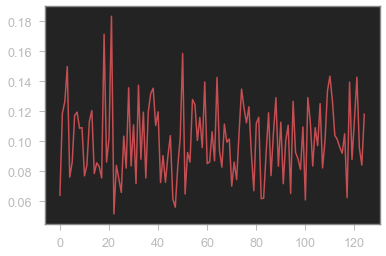

Loss before training 0.06403475999832153
Loss after training 0.1180482804775238


In [122]:
train(train_loader, model, opt, criterion)

In [ ]:
from torch.utils.data import Dataset, DataLoader

In [ ]:
for (X, y) in enumerate(train_loader):
    print(X)
    print(y)

0
[tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64), tensor([1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
        1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
        0, 0, 0, 0, 0, 1, 1, 0])]
1
[tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64), tensor([

KeyboardInterrupt: 

In [ ]:
def collate_batch(batch):
    word_tensor = torch.tensor([[1.], [0.], [45.]])
    label_tensor = torch.tensor([[1.]])

    text_list, classes = [], []

    for (_text, _class) in batch:
        text_list.append(word_tensor)
        classes.append(label_tensor)

    text = torch.cat(text_list)
    classes = torch.tensor(classes)

    return text, classes

In [ ]:
# create DataLoader object of DataSet object
bat_size = 2
DL_DS = DataLoader(TD, batch_size=bat_size, shuffle=True)

# loop through each batch in the DataLoader object
for (idx, batch) in enumerate(DL_DS):

    # Print the 'text' data of the batch
    print(idx, 'Text data: ', batch, '\n')

    # Print the 'class' data of batch
    print(idx, 'Class data: ', batch, '\n')